# Pêndulo de Newton

*Modelagem e Simulação do Mundo Físico*

Grupo: Antônio Amaral, Arthur Barreto, Ana Laiz Farias, Luan Cintra

*#Importando Bibliotecas*

In [71]:
#Numpy
import numpy as np
#MatPlotLib
import matplotlib.pyplot as plt
#Math
from math import *
#Solve_IVP
from scipy.integrate import solve_ivp

*#Medidas Padrões*

In [72]:
L = 0.06
g = 10
m = 0.0064
D = 0.04
K = 0.92
r = 5e-4

*#Modelo*

In [73]:
def modelo(t,lista):
    x = lista[0]
    y = lista[1]
    vx = lista[2]
    vy = lista[3]
    v = sqrt( vx**2 + vy**2 )
    cosseno = ( L - y ) / L
    seno = - x / L
    T = m * g * cosseno + m * v**2 / L
    dxdt = vx
    dydt = vy
    dvxdt = T / m * seno
    dvydt = - g + T / m * cosseno
    
    return [ dxdt , dydt , dvxdt , dvydt ]
    
def cond_parada(t, lista):
    return lista[0]

cond_parada.terminal = True

def encontra_t_max(lista_t,lista_y):
    ymax = lista_y[0]
    tmax = 0
    for i in range(len(lista_t)):
        if lista_y[i]>ymax:
            ymax = lista_y[i]
            tmax = lista_t[i]
    return tmax

*#Calculos*

In [74]:
L = 0.06 #Comprimento de L
x_0 = -7.344e-2 #X Inicial
y_0 = 2.725e-2 #Y Inicial

sen = y_0/L #Calculando Seno
cos = sqrt(1 - sen**2) #Calculando Cosseno

*#Testando Execução Bilateral*

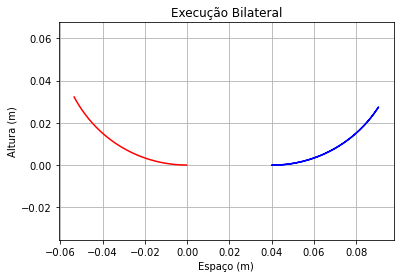

In [75]:
tf = 4 #Tempo Final
dt = 1e-3 #Delta Tempo
t_span = ( 0 , tf )
lista_t = np.arange( 0, tf, dt)

CI = [ -L*cos, L*sen+0.005 , 0 , 0 ] #Condições Iniciais

solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

lista_x = solucao.y[ 0 , : ] #X
lista_y = solucao.y[ 1 , : ] #Y
lista_vx = solucao.y[ 2 , : ] #VX

plt.plot( lista_x , lista_y , 'r')

CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

lista_x = solucao.y[ 0 , : ] + D  # D FOI SOMADO PARA REPRESENTAR A POSIÇÃO DA BOLINHA DA DIREITA
lista_y = solucao.y[ 1 , : ]

plt.plot( lista_x , lista_y, 'b')
plt.grid()
plt.title("Execução Bilateral")
plt.xlabel("Espaço (m)")
plt.ylabel("Altura (m)")
plt.axis("equal")
plt.savefig('gráfico0.png', format='png',dpi = 2400)
plt.show()

### Implementação do Modelo com Perda de energia

*#Introduzindo Listas*

In [76]:
lista_ymax = []
lista_t_ymax = []

*#Variaveis*

In [77]:
tfinal = 0

*#Condições Iniciais*

In [78]:
CI = [ -L*cos , L*sen+0.005 , 0 , 0 ]

*#Loop Principal*

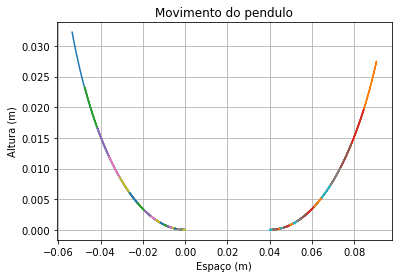

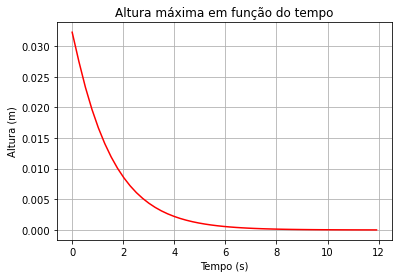

In [79]:
for i in range(50):

    if i%2 == 0 :

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ]
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax.append(max(lista_y))
        lista_t_ymax.append(encontra_t_max( solucao.t , lista_y ) + tfinal)

        tfinal = tfinal + solucao.t[-1]
        
        plt.plot( lista_x , lista_y ) 

        CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]
        
    else:
    
        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ] + D
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax.append(max(lista_y))
        lista_t_ymax.append(encontra_t_max( solucao.t , lista_y ) + tfinal)

        tfinal = tfinal + solucao.t[-1]
        
        plt.plot( lista_x , lista_y ) 
        
        CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]

#Plot Gráfico
#Movimento do Pendulo
plt.title("Movimento do pendulo")
plt.xlabel("Espaço (m)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.savefig('gráfico1.png',format='png',dpi = 1200)
plt.show() 

#Altura Máxima em Função do Tempo
plt.plot( lista_t_ymax , lista_ymax, 'r' )
plt.title("Altura máxima em função do tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.savefig('gráfico2.png',format='png',dpi = 2400)
plt.show() 



### Validação do Modelo

*#Importações*

In [80]:
import pandas

*#Recebendo e Definindo Medidas Experimentais*

In [81]:
colunas = ["t","x","y"]
datae = pandas.read_csv("Dados_MassA.csv",names = colunas)
datad = pandas.read_csv("Dados_MassB.csv",names = colunas)

te = datae.t.tolist()
# ajustar a origem no eixo do tempo

t_e = []
for t in te:
    t_e.append(t - 8.133)
    
xe = datae.x.tolist()
ye = datae.y.tolist()
# VAMOS CALCULAR A ALTURA MÁXIMA DE CADA COLISÃO
y_e_max = [ye[0],ye[33],ye[66],ye[98],ye[128],ye[161],ye[193],ye[224],ye[258],ye[289]]  
t_e_ok = [t_e[0],t_e[33],t_e[66],t_e[98],t_e[128],t_e[161],t_e[193],t_e[224],t_e[258],t_e[289]]

# ajustar a origem no eixo do tempo para o lado direito
td = datad.t.tolist()

t_d = []
for t in td:
    t_d.append(t - 8.275)
        
xd = datad.x.tolist()
yd = datad.y.tolist()
y_d_max = [yd[18],yd[50],yd[82],yd[115],yd[147],yd[179],yd[210],yd[240],yd[273],yd[305]]
t_d_ok = [t_d[18],t_d[50],t_d[82],t_d[115],t_d[147],t_d[179],t_d[210],t_d[240],t_d[273],t_d[305]]

# print(ye[0])
# print(lista_ymax[0])
d = lista_ymax[0] - ye[0]
#print("Devemos deslocar {} no eixo".format(d))
y = []
for x in lista_ymax:
    y.append(x - d)


*#Plotando Gráficos*

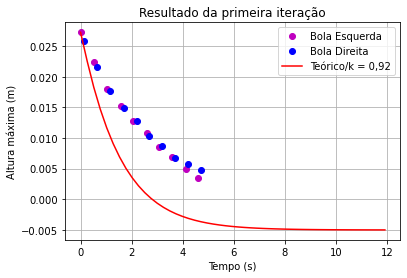

In [82]:
plt.title("Resultado da primeira iteração")
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita")
plt.plot(lista_t_ymax , y, 'r', label = "Teórico/k = 0,92")
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.savefig('gráfico3.png',format='png',dpi = 2400)
plt.show()

#### Verificando Qual a Melhor Constante de Perda (K)

*#Criando Lista de K*

In [83]:
lisK = np.arange(0.96,0.965,0.001)

*#Loop Principal*

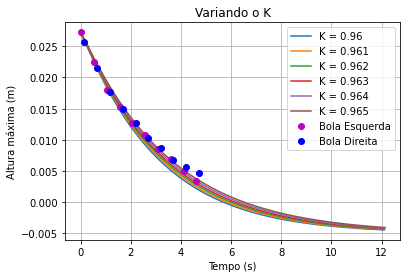

In [84]:
for K in lisK:
    
    CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]
    
    lista_ymax_1 = []
    lista_t_ymax_1 = []
    tfinal_1 = 0

    for i in range(50):

        if i%2 == 0 :

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ]
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

        else:

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ] + D
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]
            
    # agora plotar os graficos corretos
    
    y = []
    for x in lista_ymax_1:
        y.append(x - d)
    
    plt.plot( lista_t_ymax_1 , y, label = "K = {}".format(K))

#Plot Gráfico - Variação de K
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita") 
plt.title("Variando o K")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.legend()
plt.savefig('gráfico4.png',format='png',dpi = 2400)
plt.show()

#### Criando Modelo com K Calibrado

*#Listas*

In [85]:
lista_ymax_2 = []
lista_t_ymax_2 = []
y1 = []

*#Condições Iniciais*

In [86]:
CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]

*#Variaveis*

In [87]:
tfinal_2 = 0
K = 0.963

*#Loop Principal*

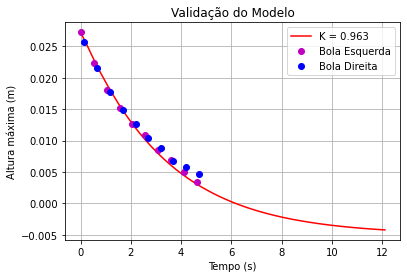

In [88]:
for i in range(50):

    if i%2 == 0 :

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ]
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]
        
        lista_ymax_2.append(max(lista_y))
        lista_t_ymax_2.append(encontra_t_max( solucao.t , lista_y ) + tfinal_2)

        tfinal_2 = tfinal_2 + solucao.t[-1]

        #plt.plot( lista_x , lista_y ) 

        CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

    else:

        solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

        lista_x = solucao.y[ 0 , : ] + D
        lista_y = solucao.y[ 1 , : ]
        lista_vx = solucao.y[ 2 , : ]

        lista_ymax_2.append(max(lista_y))
        lista_t_ymax_2.append(encontra_t_max( solucao.t , lista_y ) + tfinal_2)

        tfinal_2 = tfinal_2 + solucao.t[-1]

        #plt.plot( lista_x , lista_y ) 

        CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]

# agora plotar os graficos corretos


for x in lista_ymax_2:
    y1.append(x - d)

        
#print(lista_t_ymax_2)
          
plt.plot( lista_t_ymax_2 , y1, "r", label = "K = {}".format(K))
plt.plot(t_e_ok,y_e_max,"mo", label = "Bola Esquerda")
plt.plot(t_d_ok,y_d_max,"bo", label = "Bola Direita") 
plt.title("Validação do Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.legend()
plt.savefig('gráfico5.png',format='png',dpi = 2400)
plt.show() 

### Gráfico Conclusivo do Modelo

## Modelo

*Neste Modelo acrescentamos a opção de variar a massa das bolas do Pêndulo*

In [89]:
def modelo1(t,lista,M):
    x = lista[0]
    y = lista[1]
    vx = lista[2]
    vy = lista[3]
    v = sqrt( vx**2 + vy**2 )
    cosseno = ( L - y ) / L
    seno = - x / L
    T = M * g * cosseno + M * v**2 / L
    dxdt = vx
    dydt = vy
    dvxdt = T / (M * seno)
    dvydt = - g + T / (M * cosseno)
    Dxdt = [dxdt,dydt,dvxdt,dvydt]
    return Dxdt
def cond_parad(t, lista,M):
    return lista[0]

cond_parada.terminal = True

In [90]:
Lista_K = np.arange (0,0.99,3e-3)
print(len(Lista_K))

330


*#Loop Principal*

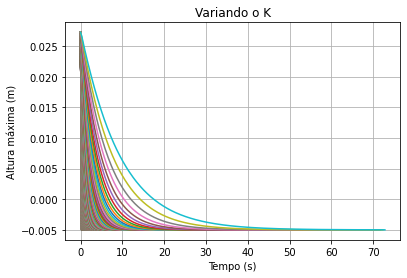

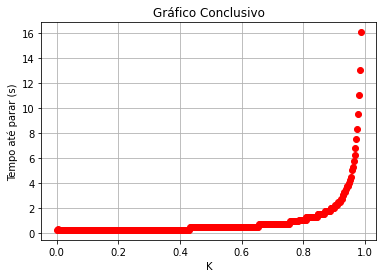

In [91]:
t_max = []
y_max = []

for K in Lista_K:
    CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]
    
    lista_ymax_1 = []
    lista_t_ymax_1 = []
    tfinal_1 = 0

    for i in range(300):

        if i%2 == 0 :

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ]
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]
           

        else:

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ] + D
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]
            lista_ymax_1.append(max(lista_y))
            lista_t_ymax_1.append(encontra_t_max( solucao.t , lista_y ) + tfinal_1)

            tfinal_1 = tfinal_1 + solucao.t[-1]

            #plt.plot( lista_x , lista_y ) 

            CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]
            
            
            
            
    # agora plotar os graficos corretos
    
    y3 = []
    for x in lista_ymax_1:
        y3.append(x - d)
    soma = 0

    for e in y3:
        if e <= 1e-3:
            soma+=1
            index = y3.index(e)
            t_max.append(lista_t_ymax_1[index])
            break
    plt.plot(lista_t_ymax_1,y3)

#Plot Gráfico - Variação de K
plt.title("Variando o K")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura máxima (m)")
plt.grid(True)
plt.savefig('gráfico6.png',format='png',dpi = 2400)
plt.show()

plt.plot(Lista_K,t_max, "ro")
plt.title("Gráfico Conclusivo")
plt.xlabel("K")
plt.ylabel("Tempo até parar (s)")
plt.grid(True)
plt.savefig('gráfico7.png',format='png',dpi = 2400)
plt.show()

## Animação do modelo

In [85]:
# vamos rodar a animação para k = 0.2, 0.4, 0.6, 0.8 e 1

K_anim = [0.2,0.4,0.6,0.8,0.99]

for K in K_anim:
    # agora é rodar a solv_ivp
    
    CI = [ -L*cos , L*sen + 0.005, 0 , 0 ]
    
    for i in range(4):

        if i%2 == 0:

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )


            lista_x = solucao.y[ 0 , : ]
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            if K == 0.2:
                # k = 0,2
                x1_e = lista_x
                y1_e = lista_y
            elif K == 0.4:
                # k = 0,4
                x2_e = lista_x
                y2_e = lista_y
            elif K == 0.6:
                # k = 0,6
                x3_e = lista_x
                y3_e = lista_y
            elif K == 0.8:
                # k = 0,8
                x4_e = lista_x
                y4_e = lista_y

            elif K == 0.99:
                # k = 1
                x5_e = lista_x
                y5_e = lista_y

            CI = [ 1e-4 , 0 , K * lista_vx[-1] , 0 ]

        else:

            solucao = solve_ivp( modelo , t_span , CI , events = cond_parada , t_eval = lista_t )

            lista_x = solucao.y[ 0 , : ] + D
            lista_y = solucao.y[ 1 , : ]
            lista_vx = solucao.y[ 2 , : ]

            if K == 0.2:
                # k = 0,2
                x1_d = lista_x
                y1_d = lista_y

            elif K == 0.4:
                # k = 0,4
                x2_d = lista_x
                y2_d = lista_y
            elif K == 0.6:
                # k = 0,6
                x3_d = lista_x
                y3_d = lista_y
            elif K == 0.8:
                # k = 0,8
                x4_d = lista_x
                y4_d = lista_y
            elif K == 0.99:
                # k = 1
                x5_d = lista_x
                y5_d = lista_y
                
            CI = [ -1e-4 , 0 , K * lista_vx[-1] , 0 ]
        
#################### fim das listas da animação ###################

# INSIRA AQUI SEU CÓDIGO PARA FAZER A ANIMAÇÃO
%matplotlib qt5
plt.close('all')
get_ipython().magic('matplotlib qt5')
import matplotlib.patches as patches
from matplotlib import animation
fig2 = plt.figure(figsize=(20,5))
plt.title('Pêndulo de Newton')
plt.xlabel('$x \quad [m]$')
plt.ylabel('$y \quad [m]$')

ax2 = fig2.add_subplot(111)

ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.005,0.04)

esfera_1_e = patches.Circle((0,0), r, fc='b')
esfera_1_d = patches.Circle((D,0), r, fc='r')
esfera_2_e = patches.Circle((0,0), r, fc='violet')
esfera_2_d = patches.Circle((D,0), r, fc='bisque')
esfera_3_e = patches.Circle((0,0), r, fc='m')
esfera_3_d = patches.Circle((D,0), r, fc='silver')
esfera_4_e = patches.Circle((0,0), r, fc='g')
esfera_4_d = patches.Circle((D,0), r, fc='orange')
esfera_5_e = patches.Circle((0,0), r, fc='gold')
esfera_5_d = patches.Circle((D,0), r, fc='lime')

#### teste para dobrar a lista ##########
xe = [0]*131*2
xd = [D]*131
y = [0]*131*2


def init2():
    ax2.add_patch(esfera_1_e)
    ax2.add_patch(esfera_2_e)
    ax2.add_patch(esfera_3_e)
    ax2.add_patch(esfera_4_e)
    ax2.add_patch(esfera_5_e)
    ax2.add_patch(esfera_1_d)
    ax2.add_patch(esfera_2_d)
    ax2.add_patch(esfera_3_d)
    ax2.add_patch(esfera_4_d)
    ax2.add_patch(esfera_5_d)
    return None

def animate2(i):
    d = i - 131
    def esquerda(i):
        esfera_1_e.center = x1_e[i], y1_e[i]
        esfera_2_e.center = x2_e[i], y2_e[i]
        esfera_3_e.center = x3_e[i], y3_e[i]
        esfera_4_e.center = x4_e[i], y4_e[i]
        esfera_5_e.center = x5_e[i], y5_e[i]
    def direita(d):
        esfera_1_d.center = x1_d[d], y1_d[d]
        esfera_2_d.center = x2_d[d], y2_d[d]
        esfera_3_d.center = x3_d[d], y3_d[d]
        esfera_4_d.center = x4_d[d], y4_d[d]
        esfera_5_d.center = x5_d[d], y5_d[d]
    def espera_E(i):
        direita(i)
        esfera_1_e.center = xe[i], y[i]
        esfera_2_e.center = xe[i], y[i]
        esfera_3_e.center = xe[i], y[i]
        esfera_4_e.center = xe[i], y[i]
        esfera_5_e.center = xe[i], y[i]
        
    def espera_D(i):
        esquerda(i)
        esfera_1_d.center = xd[i], y[i]
        esfera_2_d.center = xd[i], y[i]
        esfera_3_d.center = xd[i], y[i]
        esfera_4_d.center = xd[i], y[i]
        esfera_5_d.center = xd[i], y[i]
    b = 0
    while b <= 131*2:
        espera_D(i)
        espera_E(i)
        b += 1

    return None

anim = animation.FuncAnimation(fig2, animate2, init_func=init2, frames=len(y5_d), interval=1, blit=False)
    

<ipython-input-85-87f020e31ab5>:90: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig2.add_subplot(111)
